# ETL y ELT 📊✨

En este notebook exploraremos todas las partes de las iniciales **E.T.L.** punto a punto:

**Extract:** 🔍 Extraer/Leer información de fuentes de datos diversas.

**Transform:** 🔄 Transformar, limpiar, normalizar, etc... Estos datos extraídos para que sean consumibles por otros servicios.

**Load:** 📥 Cargar los datos limpios y tratados a sistemas de almacenamiento. El objetivo de este punto es tomar estos datos tratados y construir análisis, modelos de ML 🤖, o ser consumidos por sistemas de Business Intelligence (Power BI, Qlik, etc...).

### ETL vs. ELT 🔄🆚📥

Estos sistemas se diferencian dada la lógica de negocio respecto a los datos a ser consumidos: si son estructurados, si se necesita hacer un consumo en tiempo real ⏰ o por batches 📦, etc... A continuación se pueden ver un par de diagramas para observar la diferencia.

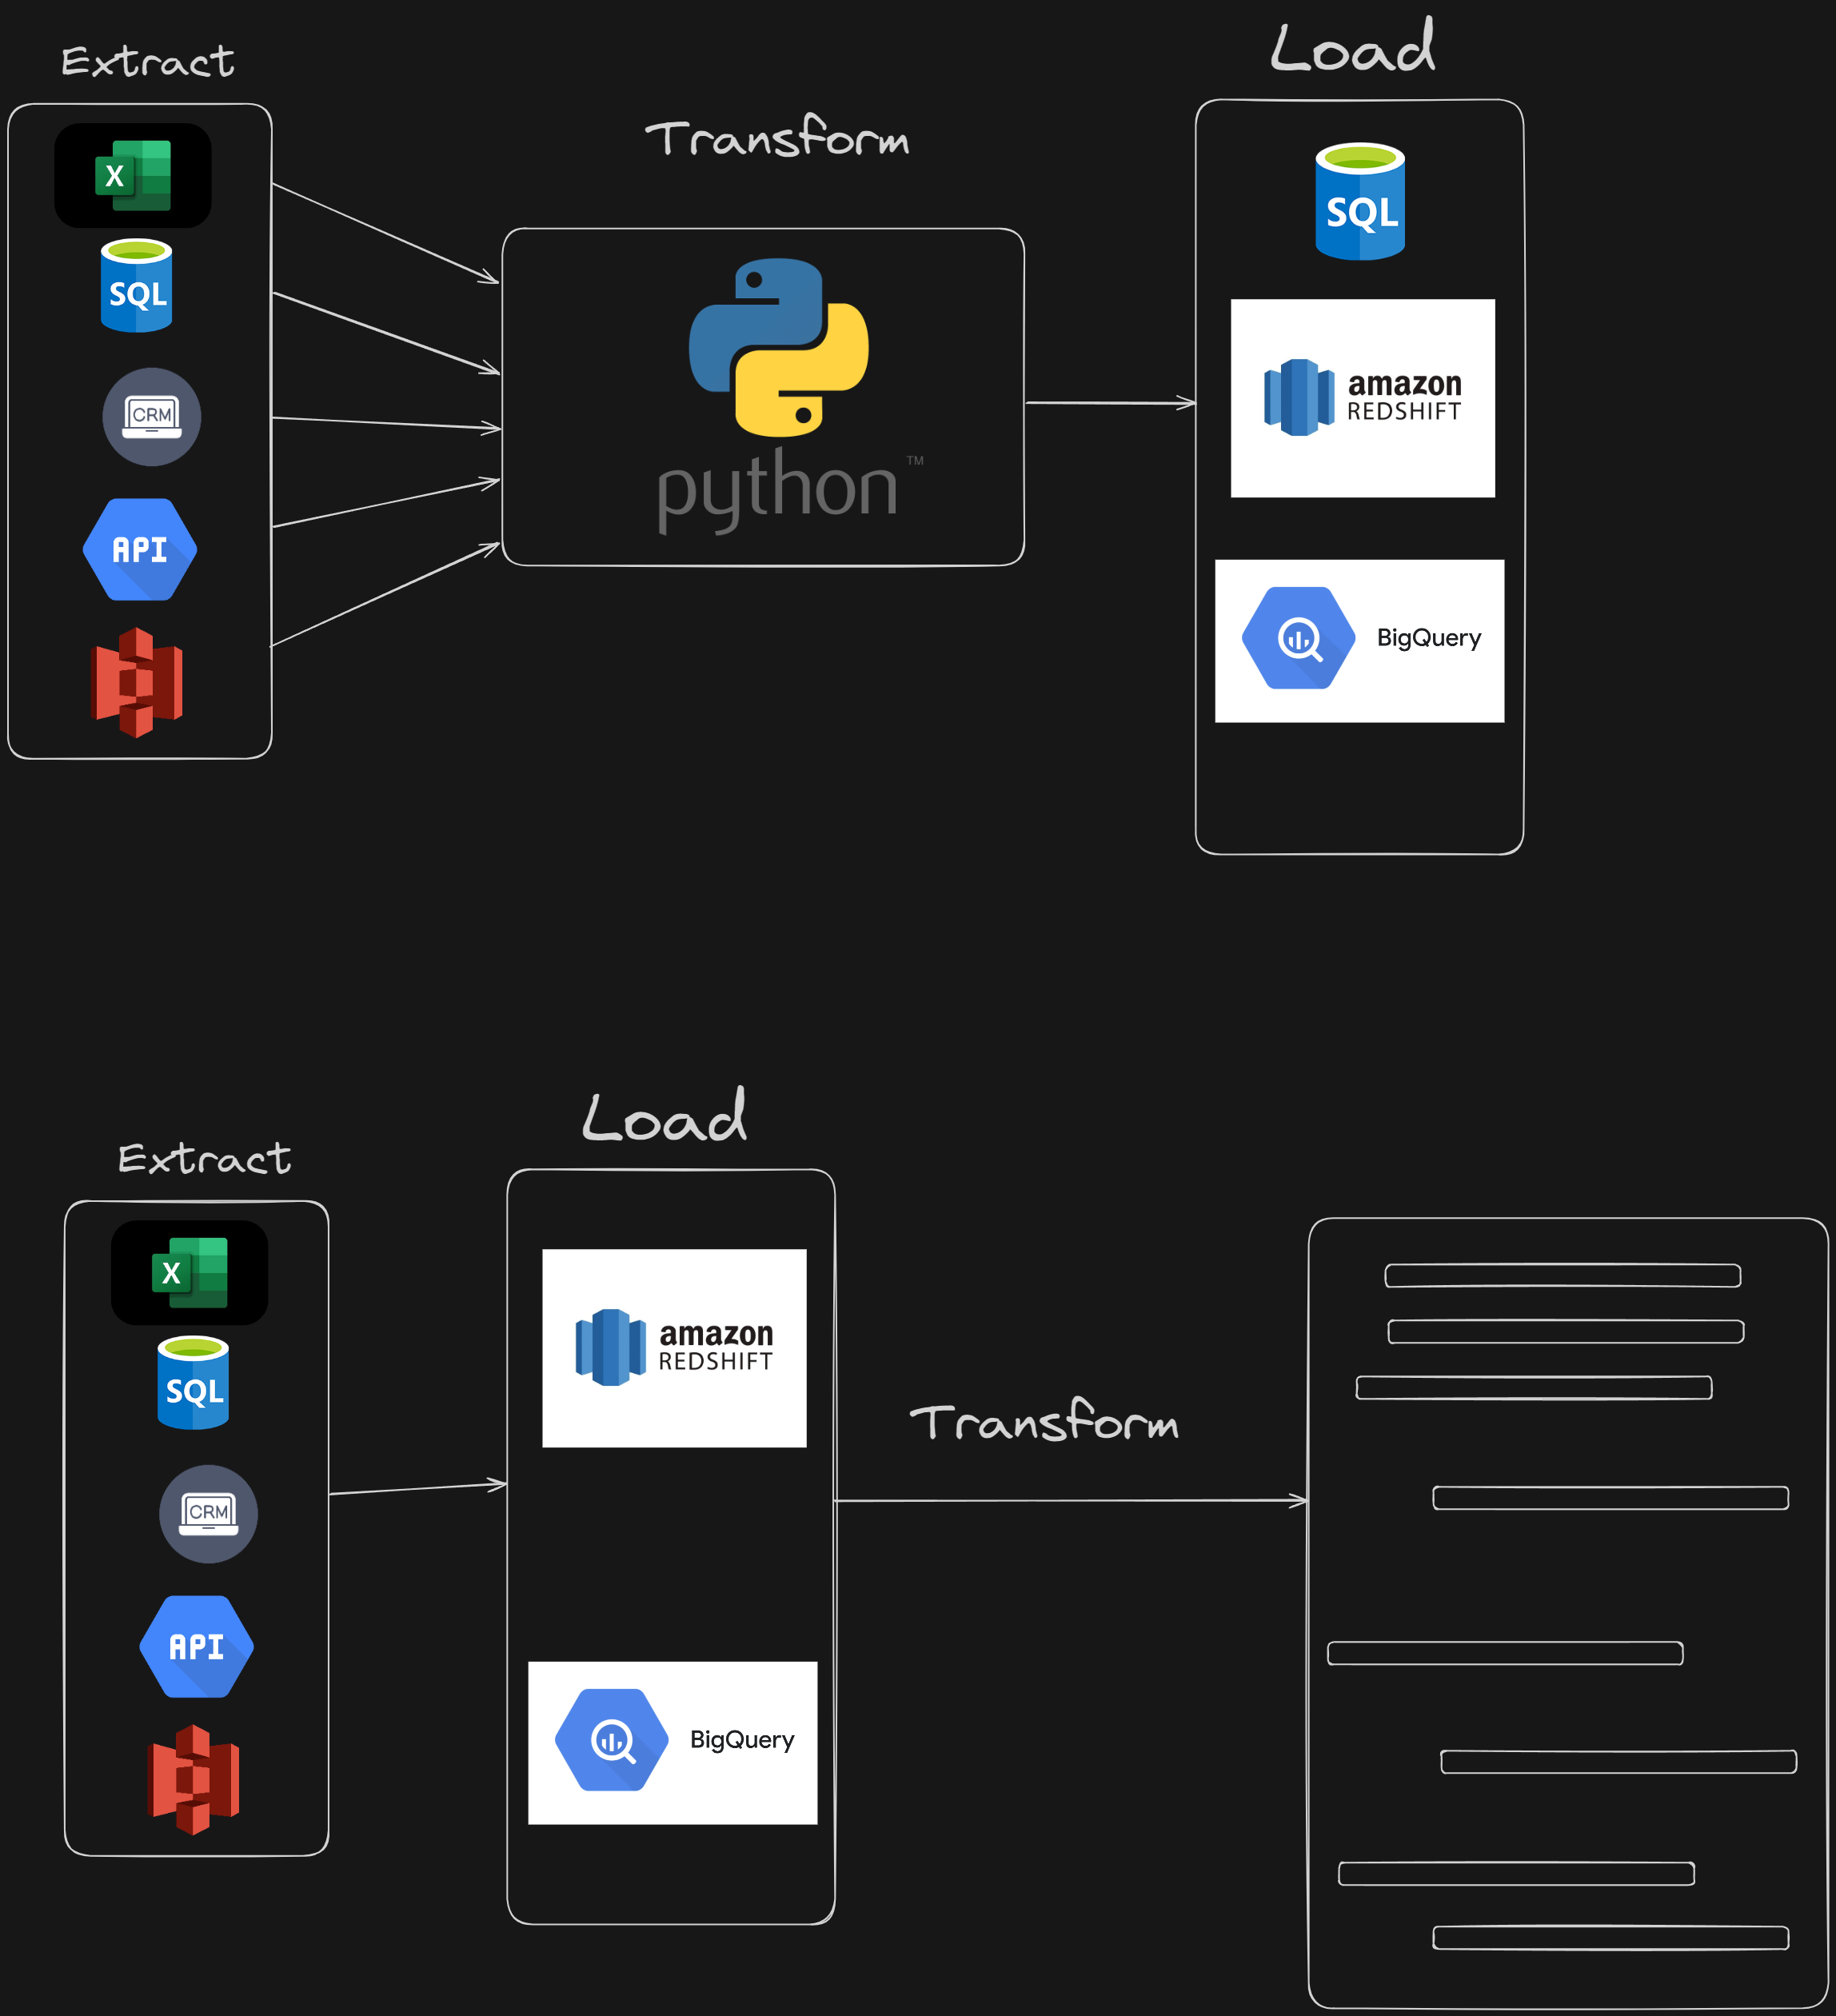

En este notebook nos centraremos únicamente en la lógica del clásico **ETL** 🛠️, ya que para explotar de manera correcta el **ELT** necesitamos software en la nube ☁️ ligeramente avanzado. Además, con la lógica de entender **ETL** se podrán hacer desarrollos del **ELT** en el futuro de su carrera profesional 🚀.

# 🌟 Data Extraction (La 'E') 🌟

- 🗂️ Los datos se recopilan de múltiples fuentes, a menudo dispares, como bases de datos 📚, sistemas CRM 🖥️, APIs 🌐, archivos planos (como CSV 📄) o almacenamiento en la nube ☁️.

- 🎯 El objetivo es obtener todos los datos relevantes en su forma bruta.

Hay varias maneras de obtener información y traerla a un formato manejable. Como estamos trabajando con Python 🐍, haremos uso de herramientas Pythonistas 🛠️. Una de las más Pythonistas y simples de usar es **`Pandas`** 🐼, una librería súper robusta para el manejo y tratamiento de datos en forma estructurada (tablitas 📊).

¡Así que, primero lo primero, importemos! 🧑‍💻✨

In [1]:
# Importando Pandas (Asumiré que tienen un conocimiento básico de Python, NumPy y Panas)
import pandas as pd

Los datos, se pueden obtener de diferentes fuentes (sources en inglés), aquí va un listado de algunas bastantes generales:
- 📄 Archivos de texto plano (`.csv`, `.txt`, `.json`, `.yaml`) o archivos binarios (`.xlsx`, `.xlsb`, `.parquet`, `.fits`, `.npy`)
- 🗄️ Bases de datos SQL o NoSQL
- 🧑‍💼 Sistemas de CRM (Client Relationship Management)
- 🌐 APIs
- ☁️ Sistemas de almacenamiento en la nube como S3, como Google Drive, Azure Storage Account, etc...
- 🕸️ WEB SCRAPPING!

## Archivos de texto
Para leer estos archivos es tan simple como usar la función, `read_algo()` de pandas, si quieres un excel, `read_excel()`, si quieres un csv, `read_csv()` y así sucesivamente. Veamos algunos ejemplos:

- 🎮 [Gaming](https://www.kaggle.com/datasets/nayanack/online-game-dataset)

- 👥 [Adult Dataset](https://archive.ics.uci.edu/dataset/2/adult)

- 🌌 [Galaxias]()

In [2]:
# CSV
df = pd.read_csv('./Online_game.csv') # Leer los datos
df.head() # Ver las primeras 5 columnas

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
# Habrá veces en las que necesitarás más parámetros para poder leer de manera correcta un csv o excel, por ejemplo, el número de filas a saltar, el nombre de las columnas, etc...
column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]

In [4]:
data = pd.read_csv('./adult.data', names=column_names, sep=',\s*', engine='python')
data.head()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\gabir\AppData\Local\Temp\ipykernel_21784\3962363271.py:1: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv('./adult.data', names=column_names, sep=',\s*', engine='python')


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Bases de datos SQL 🗄️

Para leer cosas de una base de datos necesitamos tener establecida una base de datos, por ejemplo, SQL, y establecer una conexión con esta. Por ejemplo, yo voy a simular una base de datos **sqlite** 🗃️ (que me permite simular un SQL a partir de un archivo local con extensión `.sqlite`).

- 🌸 [Iris Dataset](https://www.kaggle.com/datasets/uciml/iris)

Viendo solo este archivo `sqlite`, realmente no seríamos capaces de leer una tabla con **Pandas** 📊. Ya que, como lo dije, es una base de datos SQL simulada, adentro de ella viven una o varias tablas, dependiendo del archivo, y primero necesitamos saber los nombres de esas tablas. 📋

In [5]:
import sqlite3 # Necesitamos importar una librería que soporte conexiones con bases de datos
# En este caso, sqlite3

In [6]:
# Crear una conexión a la base de datos SQLite (o cualquier otra base de datos que estés utilizando)
conn = sqlite3.connect('./database.sqlite')

In [7]:
# Crear un cursor para ejecutar comandos SQL
cursor = conn.cursor()

In [8]:
# Ejecutar un comando SQL para obtener los nombres de todas las tablas
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

In [9]:
# Obtener todos los resultados
tables = cursor.fetchall()

In [10]:
# Imprimir los nombres de las tablas
for table in tables:
    print(table) # Tenemos solo una tabla, la tabla Iris

('Iris',)


In [11]:
# Cerrar la conexión (Importante en especial en BD en la nube)
conn.close()

Con el nombre de la tabla que queremos leer, ahora sí podríamos meter eso en un pandas dataframe.

In [12]:
conn = sqlite3.connect("./database.sqlite") # Establecer conexión

In [13]:
# Leer una tabla específica en un DataFrame
df = pd.read_sql_query("SELECT * FROM Iris", conn)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
conn.close()

También podríamos hacer un ejemplo con una tabla **NoSQL** 📚. La lógica es la misma, solo habría que ver cuál es la manera de establecer conexión con su base de datos 🛠️. Esto lo veremos en local con algo que se llama **Docker** 🐳 al final si nos da tiempo.

## Sistemas CRM 🧑‍💼

Estos sistemas usualmente son bastante usados para empresas que tienen un contacto directo con una cantidad grande de clientes, por ejemplo, un restaurante 🍽️, una aseguradora 🏢, una tienda 🛍️, etc... Realmente no vamos a hacer el ejemplo porque no tengo una buena manera de simular un CRM o hacer el ejercicio en Colab 💻. De igual forma, no hay problema, porque usualmente estos sistemas tienen su propia **API** 🌐, por lo tanto, el siguiente punto nos servirá para muchas cosas.

## APIs 🌐

Este es mi manera de leer datos favorita 🚀. Me gustan mucho las **APIs** porque tienen un poder increíble, y con Python 🐍 se pueden desarrollar muy, muy fácil y rápido. En fin, no voy a seguir hablando de **APIs** porque me extiendo montones, pero vamos a consumir algunas APIs públicas y muy interesantes:

- [JSON Placeholder](https://jsonplaceholder.typicode.com/)

De esta API vamos a traernos **Posts** 📝. Imaginémoslo como la API de Twitter 🐦 o alguna API que nos permita traer los correos de nuestra empresa ✉️ (de manera ética y segura).

Para obtener datos de una API se utiliza una librería llamada `requests`, esta librería crea peticiones por medio de protocolo `HTTP`, es decir, por medio del protocolo básico que internet utiliza.

In [16]:
# Importando import importante
import requests as req

In [17]:
# Hacer la request
response = req.get("https://jsonplaceholder.typicode.com/posts")
data_json = response.json()
data_json[0:3]

[{'userId': 1,
  'id': 1,
  'title': 'sunt aut facere repellat provident occaecati excepturi optio reprehenderit',
  'body': 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'},
 {'userId': 1,
  'id': 2,
  'title': 'qui est esse',
  'body': 'est rerum tempore vitae\nsequi sint nihil reprehenderit dolor beatae ea dolores neque\nfugiat blanditiis voluptate porro vel nihil molestiae ut reiciendis\nqui aperiam non debitis possimus qui neque nisi nulla'},
 {'userId': 1,
  'id': 3,
  'title': 'ea molestias quasi exercitationem repellat qui ipsa sit aut',
  'body': 'et iusto sed quo iure\nvoluptatem occaecati omnis eligendi aut ad\nvoluptatem doloribus vel accusantium quis pariatur\nmolestiae porro eius odio et labore et velit aut'}]

In [18]:
# Esto también lo podemos convertir a pandas
df = pd.DataFrame(data_json)
df.head(3)

,userId,id,title,body
0,1,1,sunt aut facere repellat provident occaecati e...,quia et suscipit\nsuscipit recusandae consequu...
1,1,2,qui est esse,est rerum tempore vitae\nsequi sint nihil repr...
2,1,3,ea molestias quasi exercitationem repellat qui...,et iusto sed quo iure\nvoluptatem occaecati om...


Dependiendo de la documentación 📄, podemos poner parámetros, hacer uso de **Query Parameters**, **Path Parameters**, **Headers**, **Authorizations**, **Body**, **Cookies**🍪, **Sessions**🔑, etc. Pero por el momento, solo veamos otro ejemplo sencillo, ahora con imágenes.

- [Gaticos](https://cataas.com/)

In [19]:
response = req.get("https://cataas.com/cat/cute/says/CodigoFacilito")

In [20]:
if response.status_code in range(200, 300):
    print("Everything is amazing!")
else:
    print("Allll sucks! 🔥")
response.content[:10]

Everything is amazing!


b'\xff\xd8\xff\xdb\x00C\x00\x06\x04\x05'

Esta información no tiene absoluto sentido, vamos a ver la imagen con ayuda de otra librería llamada PIL!

In [23]:
from PIL import Image
from io import BytesIO
from IPython.display import display

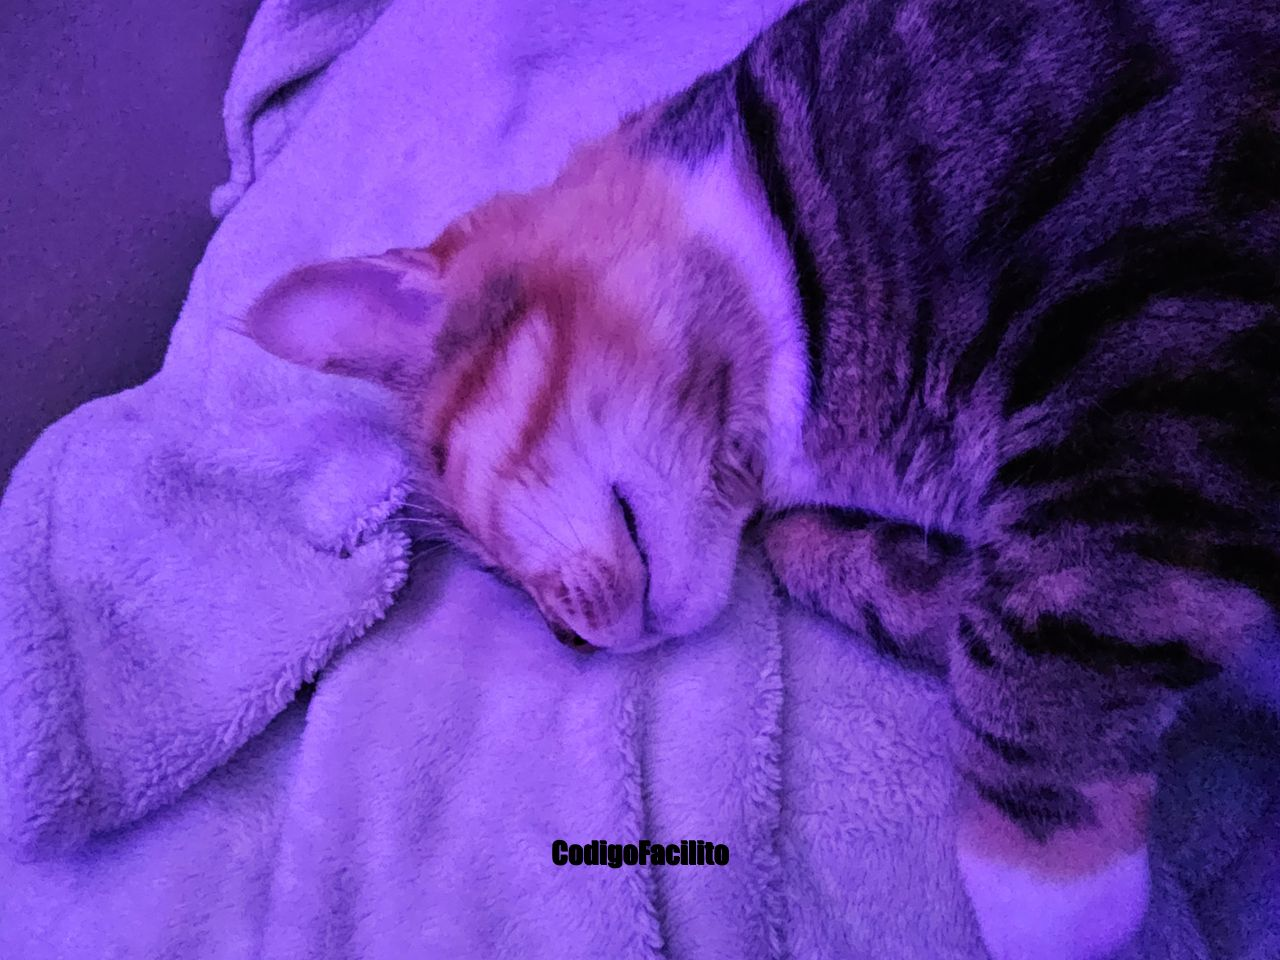

In [24]:
image = Image.open(BytesIO(response.content))
display(image)

## Sistemas de almacenamiento en la nube ☁️

Aquí se puede hacer prácticamente de todo, de cualquier lugar al que se tenga acceso, por ejemplo, **Google Drive** 📂. Pero el proceso para conectarte a un **S3**, un **Azure Storage Account** y lo que sea que **GCP** tenga es lo mismo.

En este caso, yo voy a descargar un Excel 📊 de mi Drive que saqué de [aquí](https://data.worldbank.org/indicator/SI.POV.DDAY?locations=MX).

In [ ]:
# Importar las librerías necesarias para validar autorización
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
# Autenticación (en este caso es necesario ya que mi Google Drive en principio no es público)
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Seleccionar el o los archivos
file_id = '1hDtNWh_cMif0OkmFcJAQESHF22R9fw59'
downloaded = drive.CreateFile({'id': file_id})
byte_file = downloaded.GetContentIOBuffer().read()
file_content = BytesIO(byte_file)  # Guardemos el archivo en memoria

In [ ]:
df = pd.read_excel(file_content) # Abre con skiprows=3
df.head(3)

## 🕸️ WEB SCRAPPING!

Esta es una técnica milenaria, increíble para sacar datos de, bueno, de todos lados! 🌍, ¿Wikipedia? 📚 Sí. ¿Reddit? También! 📝, ¿Tiktok? POR SUPUESTO! 🎵, con esta técnica, podemos sacar información de absolutamente cualquier lado, pero tenemos que tener un poco de práctica y entender un poco lo que es HTML 🌐. En esta clase no ahondaremos en nada de esto porque... Fuuh, sería muchísimo 😅, pero, entre las telas que tejen las redes del web scrapping, hay cosas como creación de bots con [selenium](https://selenium-python.readthedocs.io/) 🤖 o hacer requests de páginas web enteras con, y lo vimos antes, [requests](https://pypi.org/project/requests/) 🔍, pero hay muchas otras variantes.

En este caso solo usaremos web scrapping para scrappear unos datos de Wikipedia 📄. Adelante, ve a la página de tu artista favorito 🎤, de tu banda favorita 🎸 o de tu tema de ciencias favorito 🔬 e intenta sacar algo de ahí. Aquí te muestro un ejemplo de cómo scrappear una página y encontrar información con, así es adivinaste, ¡otra librería más!, llamada [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) 🍲.

In [31]:
import requests as req # Ya sé que ya lo había importado pero de nuevo no hace daño
import bs4 as bs # Importar BeautifulSoup

In [32]:
response = req.get('https://es.wikipedia.org/wiki/Enjambre_(banda)')
response.content[:100]

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-la'

In [33]:
# Quiero todos sus videos musicales
soup = bs.BeautifulSoup(response.content, 'html.parser')
tables = soup.find_all('table')
len(tables)

10

In [34]:
# Ni idea de cuál es cuál entonces vamos a ver los headers de cada una
for i, table in enumerate(tables):
    print(f"Table {i + 1} Headers:")
    headers = []
    # Encontramos todos los headers e iteramos
    for th in table.find_all('th'):
        headers.append(th.get_text(strip=True))  # Nos traemos el texto dentro de las etiquetas.
    print(headers if headers else "No headers found")
    print("\n")

Table 1 Headers:
['Enjambre', 'Datos\xa0generales', 'Origen', 'Estado', 'Información\xa0artística', 'Otros nombres', 'Género(s)', 'Período de actividad', 'Discográfica(s)', 'Web', 'Sitio web', 'Miembros', 'Exmiembros']


Table 2 Headers:
No headers found


Table 3 Headers:
No headers found


Table 4 Headers:
No headers found


Table 5 Headers:
No headers found


Table 6 Headers:
['Año', 'Título', 'Personaje', 'Director', 'Nota', 'Ref.']


Table 7 Headers:
['Año', 'Canción', 'Otro artista', 'Álbum']


Table 8 Headers:
['Año', 'Entrega', 'Entrega', 'Nominación', 'Resultado', 'Ref.']


Table 9 Headers:
['Año', 'Entrega', 'Entrega', 'Nominación', 'Resultado', 'Ref.']


Table 10 Headers:
['Control de autoridades']




In [35]:
# Bien queremos la 3, tomemos la 3
target_table = tables[2]
rows = []
for tr in target_table.find_all('tr')[1:]:  # No queremos los headers ahora
    row = []
    for td in tr.find_all(['td', 'th']):  # Obtengamos las filas
        row.append(td.get_text(strip=True))
    rows.append(row)

In [36]:
headers = ['Año', 'Canción', 'Otro Artista', 'Dirección', 'Álbum']

In [37]:
df = pd.DataFrame(rows, columns=headers)
df.head()

,Año,Canción,Otro Artista,Dirección,Álbum


In [38]:
df.head(10)

,Año,Canción,Otro Artista,Dirección,Álbum


## Epílogo de Extracción 📜

Mi trabajo aquí ha terminado, pero el tuyo está a punto de comenzar 🚀. Haz lo mismo, pero más chévere 😎. Investiga más sobre extracción de datos 🔍, si quieres, experimenta más con **requests** 📨, **BeautifulSoup** 🥣 y hacer bots con **Selenium** 🤖. Aunque para ello tendrás que aprender lo más básico de los básicos de **HTML** 📘, así que ¡mucha suerte! 🍀 Aún así, explora más, aprende más!!! ✨

# Data Transform (La 'T') 🌟

- Los datos extraídos se limpian y transforman 🧼🔄. Esto incluye limpieza de datos (eliminación de duplicados, manejo de valores perdidos) 🗑️, normalización de datos (escalado, codificación) 📏🔢 y agregación de datos (resumen de datos) 📊.

- Las transformaciones se realizan en un servidor de preparación 🖥️ para asegurar que los datos de origen permanezcan intactos y para optimizar los datos según el esquema del sistema de destino 🎯.

Para esto hay que aprender lo básico de Pandas, pero de seguro ustedes ya son expertas y expertos en lo básico de pandas 🐼, así que vámonos recio.

In [ ]:
import pandas as pd # Cómo me gusta importar lo que ya importé ¿verdad?

## Manejo de datos faltantes 🚫📊

Habrá muchas veces que tus datos no tendrán algunos valores, esto puede ser debido a fallas humanas 🧑‍💻, fallas en sistemas ⚙️, o cualquier otra razón. Prácticamente, en esta sección veremos tres de los muchos métodos que puedes tomar para manejar datos faltantes:

- Completar datos faltantes: **Imputación de datos** ✏️
  - Rellenar con la media 📈.
  - Rellenar con valores anteriores 🔄.
- Eliminar columnas con datos faltantes 🗑️.

### Imputación de datos
**Rellenar con la media, mediana, moda, interpolación, un valor en específico, etc:** Esta técnica se usa para valores numéricos en general, cuando hay muchos datos faltanes (`NaNs`), se pueden aplicar estos métodos. A continuación, un ejemplo simulado, pero funciona exactamente igual con datos reales.

In [ ]:
# DataFrame de ejemplo con valores faltantes (pero puede ser cualquier data)
data = {'Nombre': ['Ana', 'Juan', 'Luis', None], 'Edad': [25, None, 30, 22], 'Ciudad': ['Madrid', 'Barcelona', None, 'Sevilla']}
df = pd.DataFrame(data)
df

In [ ]:
# Eliminar filas con valores faltantes
df.dropna() # ¿Se guardó?

In [ ]:
# Rellenar valores faltantes con un valor específico
df.fillna({'Edad': df['Edad'].mean(), 'Ciudad': 'Desconocida'})

Conversión de Tipos de Datos 🔄
Muchas veces no vas a tener los datos en el formato en el que los necesitas 🧐. Por suerte, Pandas hace esto bastante sencillo 🐼. Tiene métodos como `pd.to_cosa`, donde esa `cosa` es algún tipo de dato específico 🔢, además, puedes manejar los errores que pueden surgir dentro de cada función ⚠️. ¡Veamos un ejemplo! 💻

In [ ]:
# DataFrame de ejemplo con tipos de datos incorrectos
data = {'Fecha': ['2023-01-01', '2023-02-01', '2023-03-01', '2024-June-02'], 'Ventas': ['100', '200', 'Juan', '800.3']}
df = pd.DataFrame(data)

# Convertir la columna 'Fecha' a tipo datetime (hay que tener cuidado)
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')

# Convertir la columna 'Ventas' a tipo numérico
df['Ventas'] = pd.to_numeric(df['Ventas'], errors='coerce')

df

##  Normalización de Datos
Muchas veces necesitamos que ciertos números estén en la misma escala, a veces de 0 a 1, a veces de 0 a 255 (Reto: A ver expliquen cuándo), o a otra cosa, para eso se usa la normalización y usualmente es un tratamiento para que los datos estén listos para visualizaciones o modelos de ML.

In [ ]:
from sklearn.preprocessing import MinMaxScaler # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [ ]:
# DataFrame de ejemplo
data = {'Altura': [150, 160, 170, 180], 'Peso': [65, 70, 75, 80]}
df = pd.DataFrame(data)

# Aplicar MinMaxScaler para normalizar los datos
scaler = MinMaxScaler()
df[['Altura', 'Peso']] = scaler.fit_transform(df[['Altura', 'Peso']]) # Es necesario poner los nombres de las columnas.
df

## Codificación de Variables Categóricas
Convertir variables categóricas a variables numéricas para análisis. Ya entramos en terreno de ML así que mucha atención.

In [ ]:
# Crear un DataFrame de ejemplo con variables categóricas
data = {'Color': ['Rojo', 'Azul', 'Verde', 'Azul']}
df = pd.DataFrame(data)
df

In [ ]:
# Convertir variables categóricas a variables numéricas con One-Hot Encoding https://www.geeksforgeeks.org/ml-one-hot-encoding/
df = pd.get_dummies(df, columns=['Color'])
df

## Creación de Nuevas Variables (Feature Engineering)
Crear nuevas características a partir de las existentes. Esto para usarlas luego en estadísticas, modelos, etc...

In [ ]:
# Crear un DataFrame de ejemplo
data = {'Fecha': pd.to_datetime(['2023-01-01', '2023-02-01', '2023-03-01'])}
df = pd.DataFrame(data)
df

In [ ]:
# Crear nuevas variables a partir de la columna 'Fecha'
df['Año'] = df['Fecha'].dt.year
df['Mes'] = df['Fecha'].dt.month
df['Día'] = df['Fecha'].dt.day
df

## Agregación de Datos 📊

Tal vez no nos interesan todos los puntos en un intervalo de tiempo ⏱️ o instancia, si no el valor total de cierto dato. Por ejemplo, en el siguiente ejemplo, simulamos ventas de dos agentes en un periodo de tiempo 💰. Podemos ver cuánto vendieron en total, eso nos ahorra espacio en memoria 💾 y sigue siendo significativo para nuestro negocio (depende de la lógica del negocio, obviamente) 📈.

In [ ]:
# Crear un DataFrame de ejemplo
data = {'Agentes': ['A', 'B', 'A', 'B'], 'Ventas': [100, 200, 150, 250]}
df = pd.DataFrame(data)
df

In [ ]:
# Agrupar por 'Categoría' y calcular la suma de 'Ventas'
df_agg = df.groupby('Agentes').agg({'Ventas': 'sum'}).reset_index()
df_agg

## Manipulaciones con Strings 📝
Ya para casi terminar la sección de Transformaciones 🔄, podemos ver muchísimas más cosas, pero algo importante es la manipulación de textos ✍️. Esto se ha vuelto mucho más importante en los últimos años 📅 con la creación de tantas técnicas de DL aplicadas a texto, o lo que se suele conocer como NLP (Procesamiento del Lenguaje Natural) 🧠. Vamos a ver el ejemplo: 📘

In [ ]:
import re # Regular expressions, una cosa muy interesante para trabajar con Strings: https://regexlearn.com/
from collections import Counter # Cosa interesante

In [ ]:
# Crear un DataFrame de ejemplo con texto desordenado
data = {'Comentarios': ['¡Me encanta este producto! 😍', 'MUY BUEN SERVICIO!!!', 'producto dañad@, no funciona :(', 'Entrega tardía, muy mal...']}
df = pd.DataFrame(data)
df

In [ ]:
# Función para limpiar y normalizar texto
def limpiar_texto(texto):
    # Convertir a minúsculas
    texto = texto.lower()
    # Eliminar emojis y caracteres especiales
    texto = re.sub(r'[^\w\s]', '', texto)
    # Eliminar tildes y caracteres no deseados
    texto = re.sub(r'[^a-zñáéíóúü\s]', '', texto)
    return texto

In [ ]:
# Aplicar la función de limpieza
df['Comentarios Limpios'] = df['Comentarios'].apply(limpiar_texto)
df

In [ ]:
# Función para tokenizar texto
def tokenizar_texto(texto):
    # Dividir texto en palabras (tokens)
    tokens = texto.lower().split()
    return tokens

In [ ]:
# Aplicar la función de tokenización
df['Tokens'] = df['Comentarios Limpios'].apply(tokenizar_texto)
# Contar la frecuencia de las palabras
todas_las_palabras = [palabra for tokens in df['Tokens'] for palabra in tokens]
contador_palabras = Counter(todas_las_palabras)
print("\nPalabras más frecuentes:", contador_palabras.most_common(5))
df

## Maña 🐼 (Agarra la onda, tener corazonadas, pensar algorítmicamente)
También hay transformaciones que son simplemente creativas ✨. Desarrollar esta habilidad para construir algoritmos es súper importante 🧠. En este caso, lo hacemos para construir una estructura de datos a partir de otra, de una tabla `HTML` 📄 a un DataFrame de `Pandas` 📊. Y tenemos que ser bastante habilidosos (agarrar maña) 🛠️ para diseñar algoritmos interesantes en caso de que esta transformación no sea directa. Arriba vimos un ejemplo de música con 0 de transformación 🎶; solo estábamos leyendo la tabla, eso salió MAL 🚫. Ahora pongámosle más cuidado y apliquemos una transformación interesante de repetir datos 🔄.

In [ ]:
import requests as req # Ya sé que ya lo había importado pero de nuevo no hace daño
import bs4 as bs # Importar BeautifulSoup

In [ ]:
# Lets rock!
response = req.get('https://es.wikipedia.org/wiki/Enjambre_(banda)')
# Quiero todos sus videos musicales
soup = bs.BeautifulSoup(response.content, 'html.parser')
tables = soup.find_all('table')

# Bien queremos la 3, tomemos la 3
target_table = tables[2]

In [ ]:
# TENEMOS QUE SER MUUUY MAÑOSOS con nuestra recolección de datos
headers = ['Año', 'Canción', 'Otro Artista', 'Dirección', 'Álbum']
rows = []
rowspan_memory = {h: 0 for h in range(len(headers))}
last_seen = {h: None for h in range(len(headers))}

for row in target_table.find_all('tr')[1:]:
    cells = row.find_all(['td', 'th'])
    j = 0
    for i in range(len(headers)):
        if not rowspan_memory[i]:
            if cells[j].has_attr('rowspan'):
                rowspan_memory[i] = int(cells[j]['rowspan']) if cells[j]['rowspan'].isdigit() else 1
            else:
                rowspan_memory[i] = 1
            last_seen[i] = cells[j].get_text(strip=True)
            j += 1
    rowspan_memory = {h: v - 1 for h, v in rowspan_memory.items()}
    rows.append([ls for ls in last_seen.values()])

# DataFrame
df = pd.DataFrame(rows, columns=headers)
df.head(15)

## Reemplazar espacios vacios con `None`

Eso puede ser más significativo para cuando carguemos los datos, por ejemplo, en SQL.

In [ ]:
df = df.replace(r'^\s*$', None, regex=True)
df.head(15)

# Load (La 'L') 📥

- Los datos transformados se cargan en un almacén de datos o repositorio 🗄️ donde pueden ser accedidos para los informes de inteligencia empresarial (BI), análisis de datos 📊, modelos de ML 🤖 o procesamiento adicional 🔄.
- Los almacenes de datos están diseñados para un rendimiento rápido de consultas ⚡ y soportan consultas complejas sobre grandes conjuntos de datos 📈.

## Guardar datos en archivos
Esto es lo contrario a la 'E' que vimos antes, y se puede hacer con pandas `to_csv()`, `to_excel()`, `to_sql()`

In [ ]:
df.to_csv('datos_enjambre.csv', index=False)

In [ ]:
df.to_excel('datos_enjambre.xlsx', index=False)

In [ ]:
df.to_parquet('datos_enjambre.parquet', index=False)

In [ ]:
# Con SQL es lo mismo
import sqlite3

In [ ]:
conn = sqlite3.connect('datos_enjambre.sqlite')
df.to_sql('datos_enjambre', conn, if_exists='replace', index=False)
conn.close()

## Guardar datos en la nube

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
from gspread_dataframe import set_with_dataframe

In [ ]:
creds, _ = default()
gc = gspread.authorize(creds)
sh = gc.create('Enjambreee')
worksheet = sh.sheet1

In [ ]:
set_with_dataframe(worksheet, df)